In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import warnings # 주피터 환경에서 경고메시지 무시하고 싶을 때
warnings.filterwarnings("ignore")

In [4]:
def eval_CM(y_test, y_pred=None, pred_prob=None, show_cm=0):
    confusion = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pred_prob)
    if show_cm:
        print(f"정확도: {acc:.4f}\n정밀도: {precision:.4f}\n재현율: {recall:.4f}\nF1: {f1:.4f}\nROC_AUC: {roc_auc:.4f}")
    else:
        print(confusion)
        print(f"정확도: {acc:.4f}\n정밀도: {precision:.4f}\n재현율: {recall:.4f}\nF1: {f1:.4f}\nROC_AUC: {roc_auc:.4f}")
    return confusion, acc, precision, recall, f1, roc_auc

In [5]:
def reg_score(y_true, y_pred):
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
    MAE = np.mean( np.abs((y_true - y_pred) / y_true) )
    NMAE = mean_absolute_error(y_true, y_pred)/ np.mean( np.abs(y_true) )
    MAPE = np.mean( np.abs((y_true - y_pred) / y_true) ) *100
    R2 = r2_score(y_true, y_pred)

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
display(train.head())
display(test.head())

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [9]:
train.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


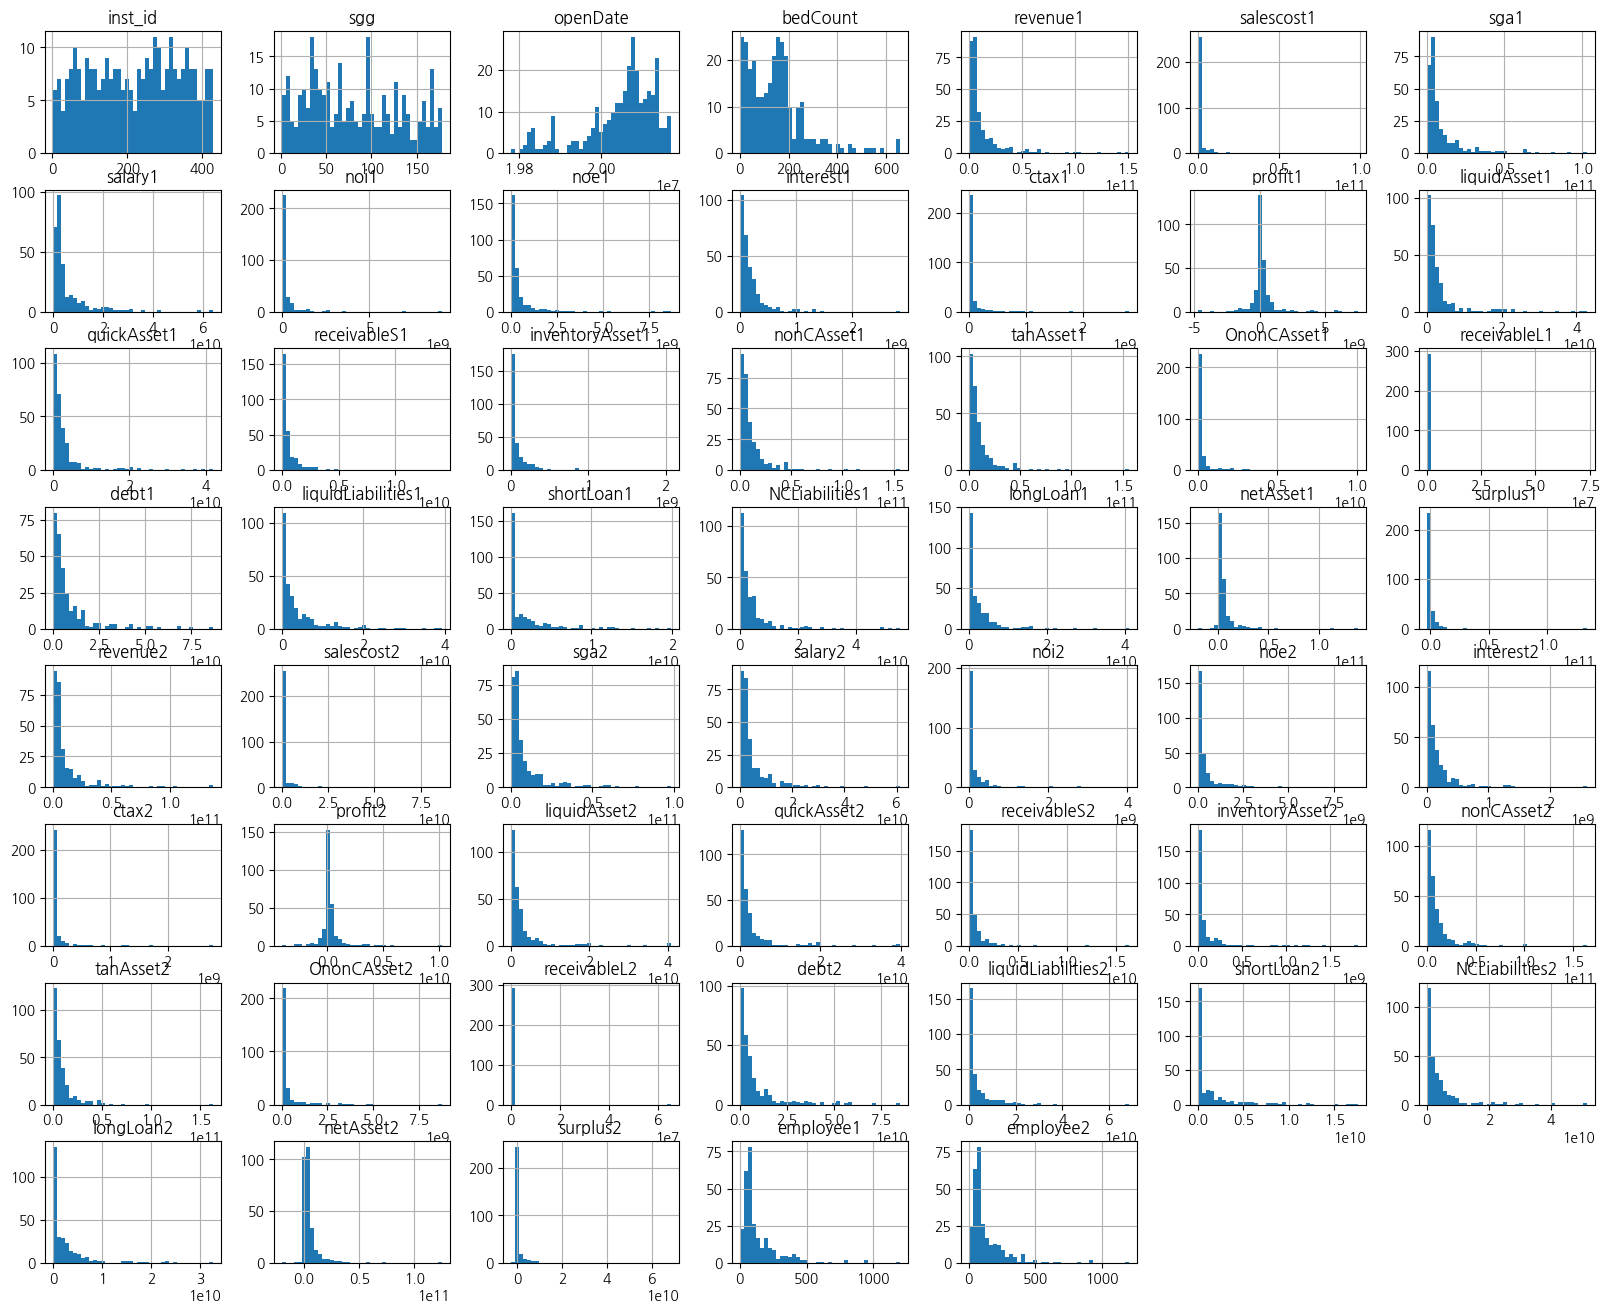

In [10]:
_ = train.hist(bins=40, figsize=(20, 16))

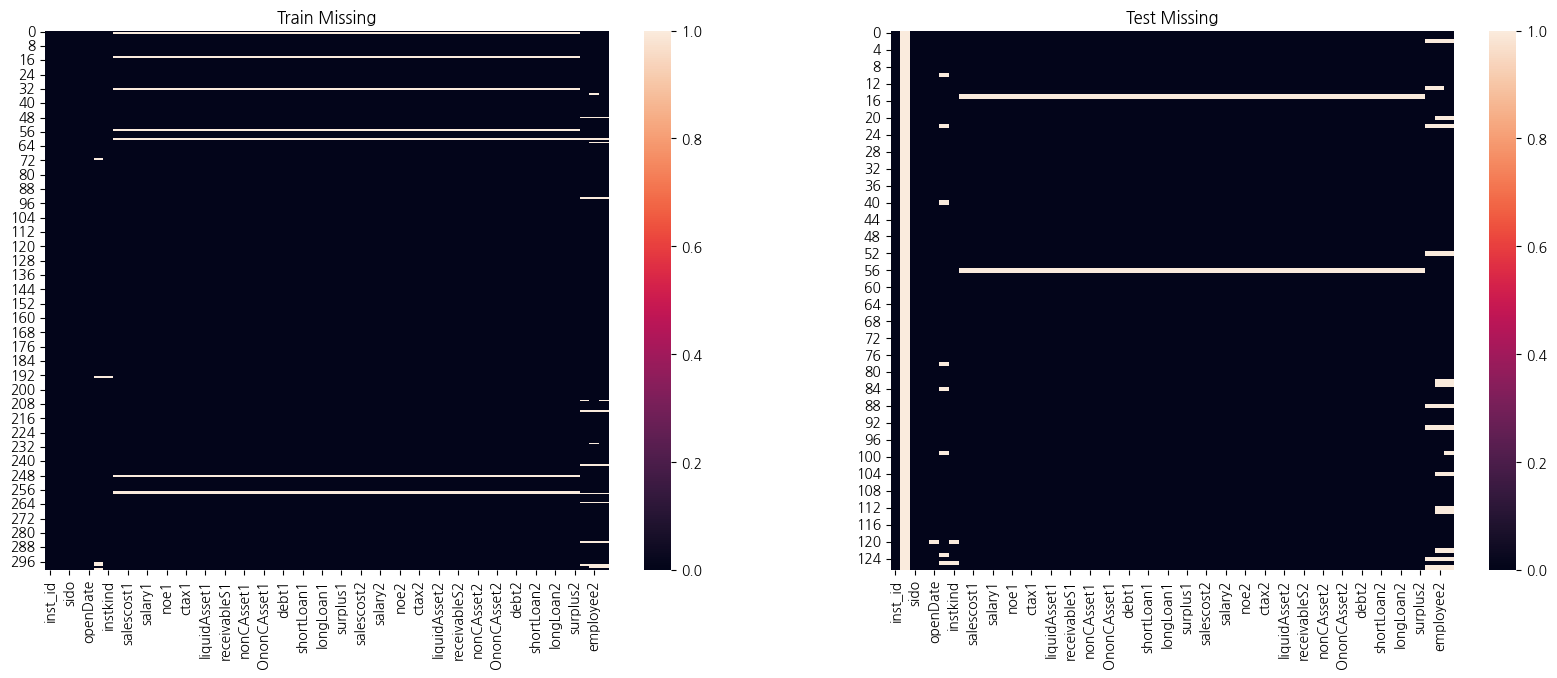

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.heatmap(train.isnull(), ax=ax[0]).set_title("Train Missing")
sns.heatmap(test.isnull(), ax=ax[1]).set_title("Test Missing")
plt.show()

In [14]:
# OC - 영업/폐업 분류
train["OC"].isnull().sum()
test['OC'].isnull().sum()

127

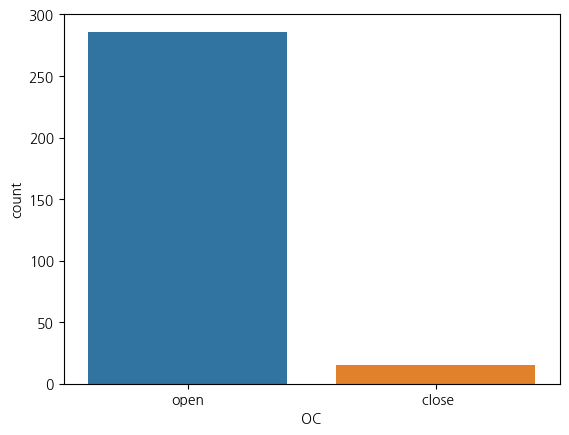

In [15]:
_ = sns.countplot(x=train['OC'])

In [17]:
train['OC'].value_counts(normalize=True)*100

OC
open      95.016611
 close     4.983389
Name: proportion, dtype: float64

In [18]:
train['sido'].isnull().sum(), test['sido'].isnull().sum()

(0, 0)

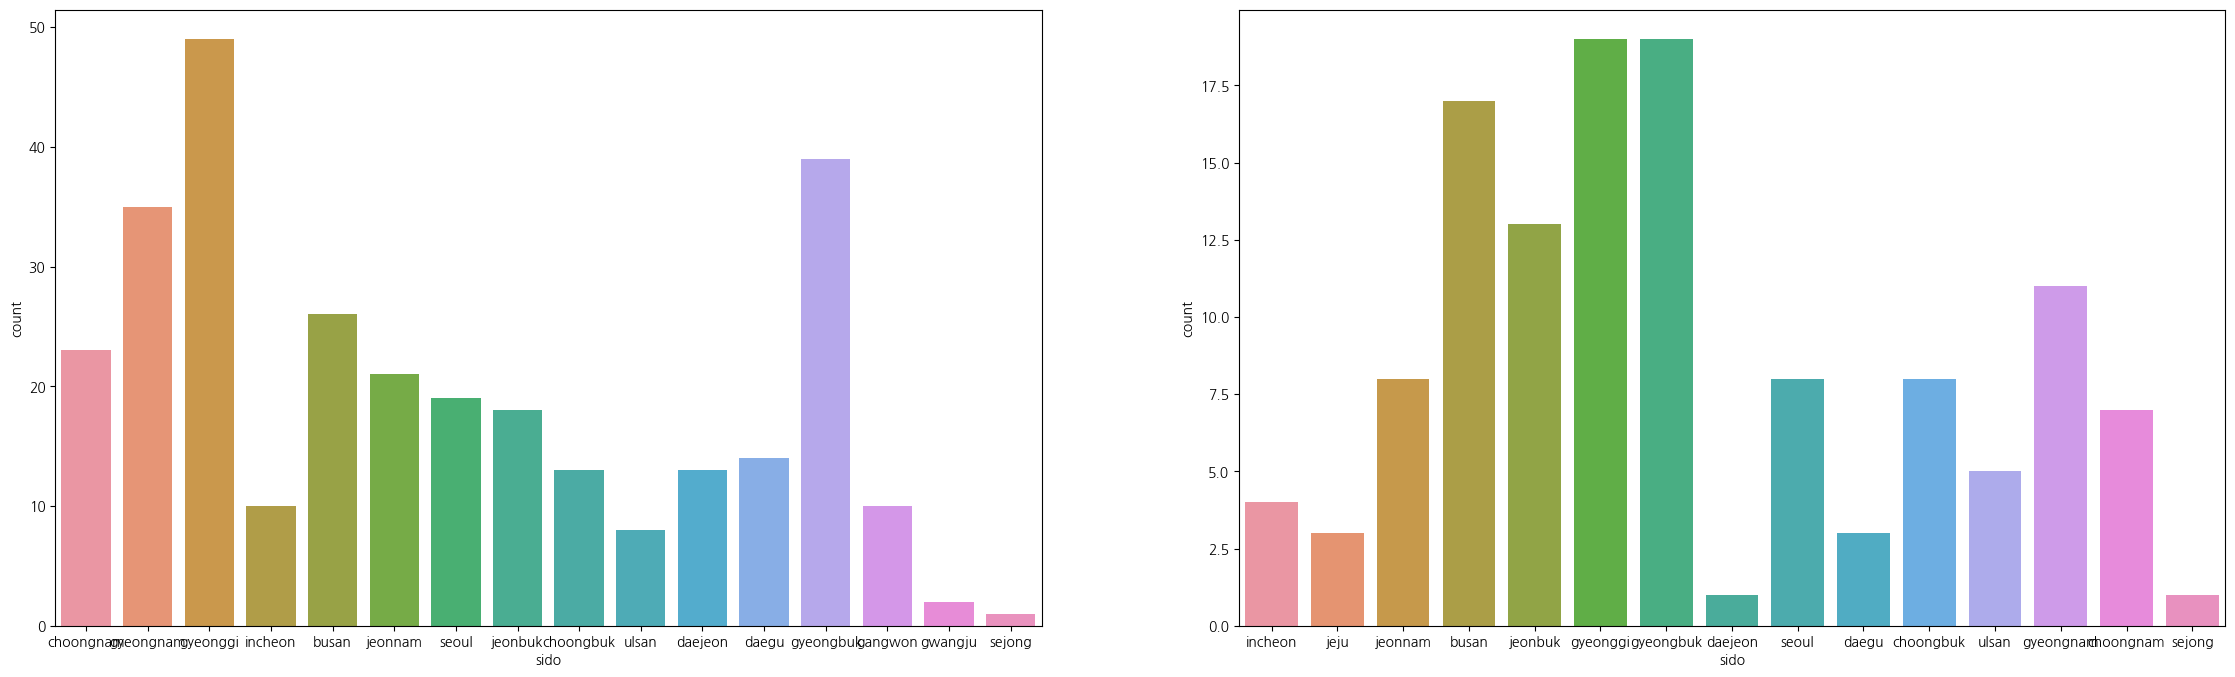

In [20]:
fig, ax = plt.subplots(1,2, figsize=(28,8))
sns.countplot(data=train, x='sido', ax=ax[0])
sns.countplot(data=test, x='sido', ax=ax[1])
plt.show()

In [23]:
# print(train['sido'].value_counts())
# print(test['sido'].value_counts())

In [24]:
# 광역 지역을 조금 더 일반화 시키는 것이 더 좋다고 판단
set(train['sido'].value_counts().index) - set(test['sido'].value_counts().index)

{'gangwon', 'gwangju'}

In [25]:
train[train['sido']=='gangwon'].shape, test[test['sido'] == 'gangwon'].shape

((10, 58), (0, 58))

In [26]:
set(test['sido'].value_counts().index) - set(train['sido'].value_counts().index)

{'jeju'}

In [27]:
train['sido'] = train['sido'].str.replace("nam|buk", "")
test['sido'] = test['sido'].str.replace("nam|buk", "")

train['sido'] = train['sido'].str.replace("gyeonggi|incheon", "gyeon-in")
test['sido'] = test['sido'].str.replace("gyeonggi|incheon", "gyeon-in")

In [28]:
sido_list = set(train['sido'].value_counts().index) | set(test['sido'].value_counts().index)
len(sido_list)

17

In [29]:
# 보기편하게 한글로 변환
train["sido"] = train["sido"].replace({"busan": "부산",
                                        "choong": "충청도",
                                        "daegu": "대구",
                                        "daejeon": "대전",
                                        "gangwon": "강원도",
                                        "gwangju": "광주",
                                        "gyeon-in": "경인",
                                        "gyeong": "경상도",
                                        "jeju": "제주도",
                                        "jeon": "전라도",
                                        "sejong": "세종",
                                        "seoul": "서울",
                                        "ulsan": "울산"})
test["sido"] = test["sido"].replace({"busan": "부산",
                                        "choong": "충청도",
                                        "daegu": "대구",
                                        "daejeon": "대전",
                                        "gangwon": "강원도",
                                        "gwangju": "광주",
                                        "gyeon-in": "경인",
                                        "gyeong": "경상도",
                                        "jeju": "제주도",
                                        "jeon": "전라도",
                                        "sejong": "세종",
                                        "seoul": "서울",
                                        "ulsan": "울산"})

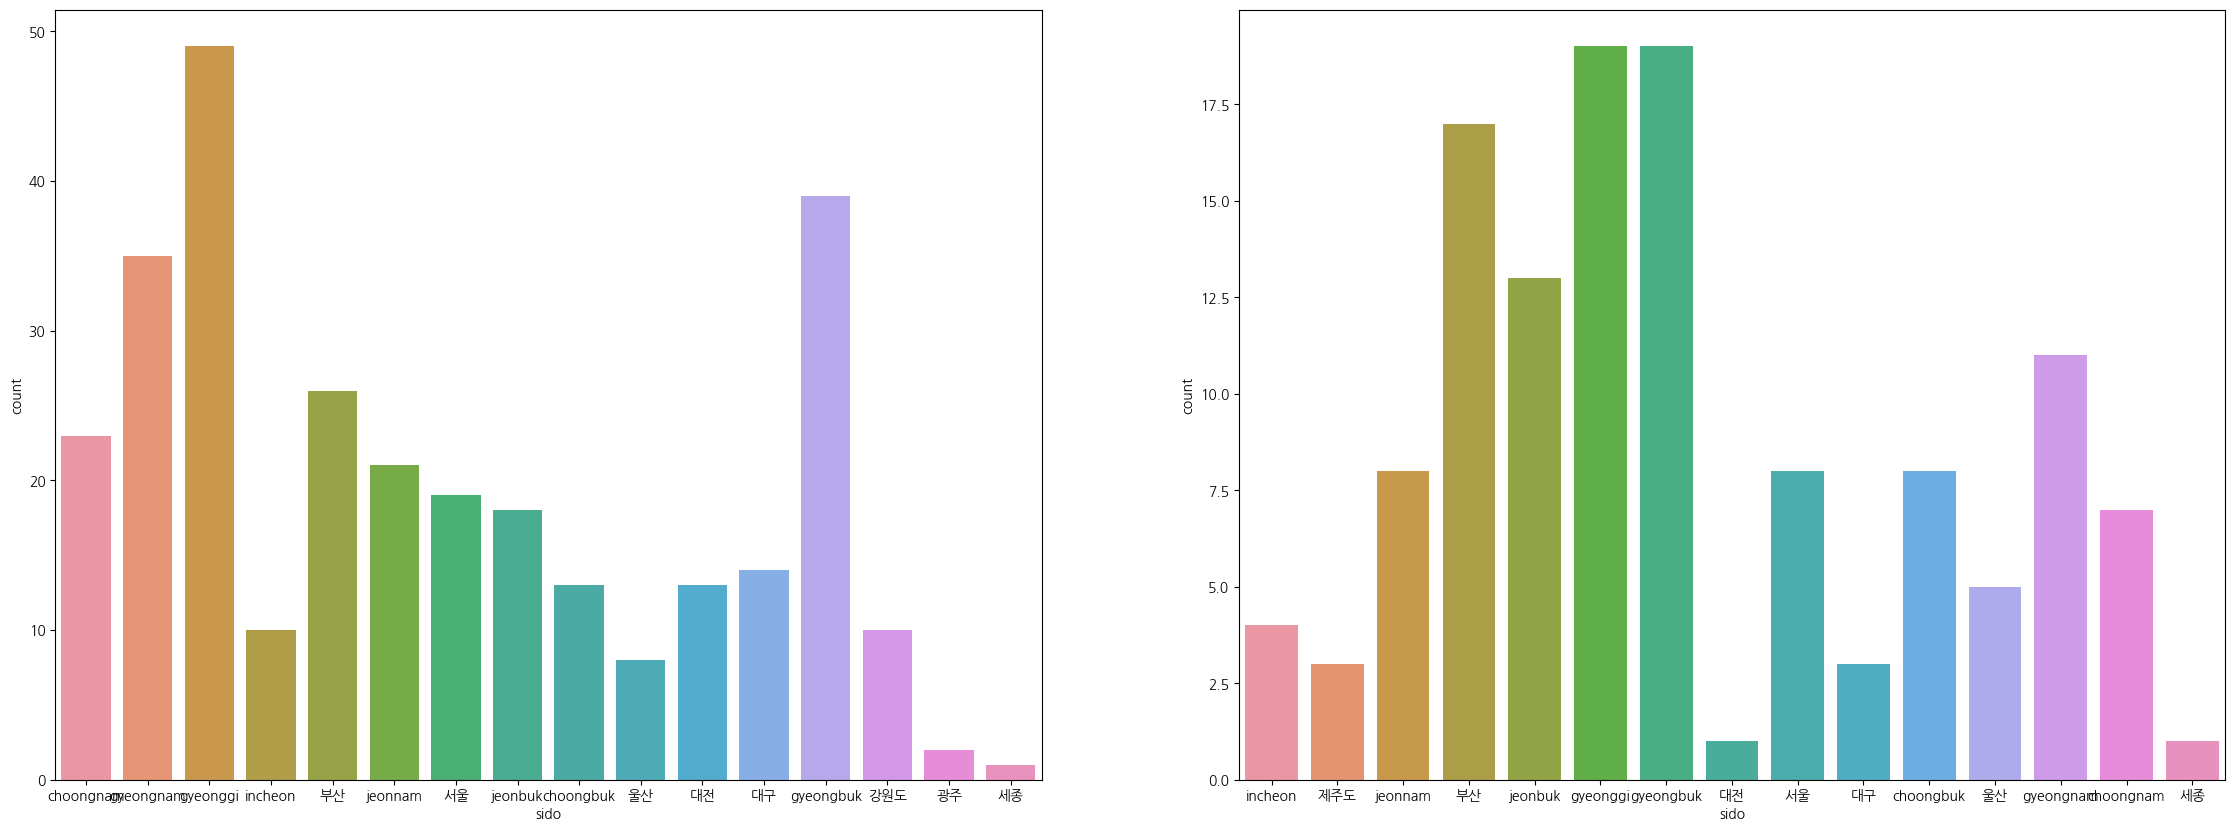

In [30]:
fig, ax = plt.subplots(1,2, figsize=(28, 10))
sns.countplot(data=train, x='sido', ax=ax[0])
sns.countplot(data=test, x='sido', ax=ax[1])
plt.show()

In [31]:
train['sgg'].isnull().sum(), test['sgg'].isnull().sum()

(0, 0)

In [32]:
from datetime import datetime
import pyupbit
import datetime as dt
train

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN


In [33]:
train['bedCount'].isnull().sum(), test['bedCount'].isnull().sum()


(5, 8)

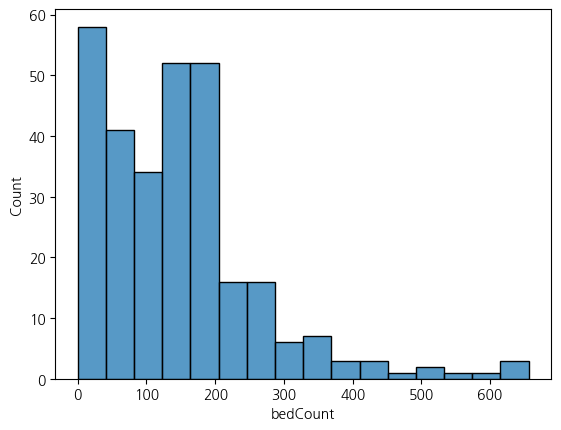

In [34]:
_ = sns.histplot(data=train, x='bedCount')

In [35]:
def bedCount(num):
    if num < 30 : return "의원"
    elif 30<=num<100 : return "병원"
    elif 100<=num<500: return "종합병원"
    elif num>=500 : return "상급종합병원"

In [36]:
train['bedCount'] = train['bedCount'].apply(bedCount)
test['bedCount'] = test['bedCount'].apply(bedCount)

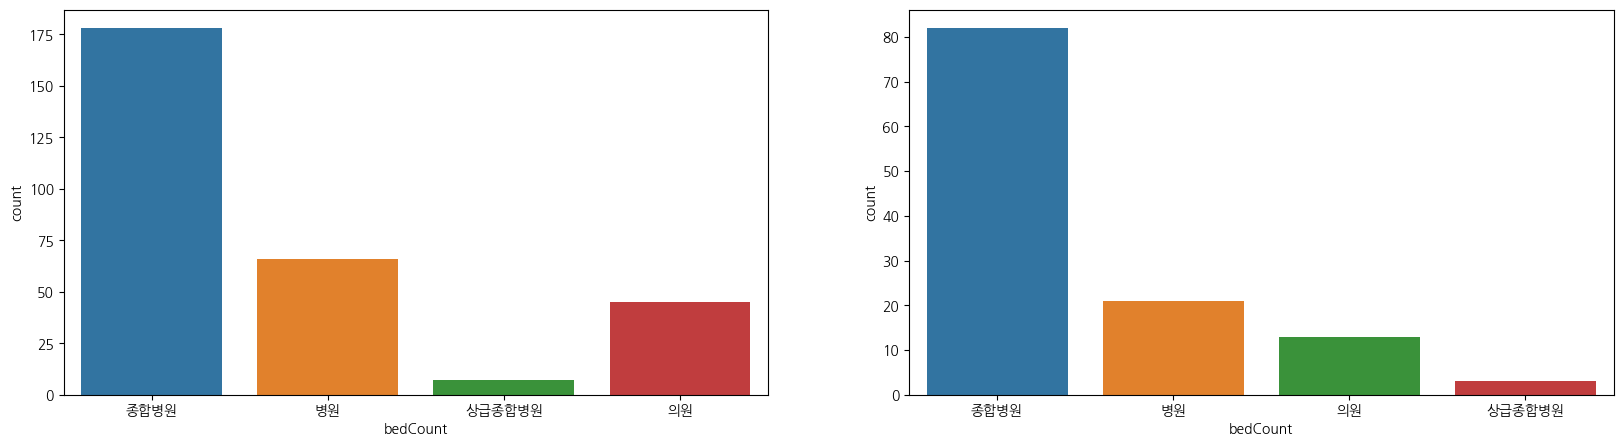

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(data=train, x='bedCount', ax=ax[0])
sns.countplot(data=test, x='bedCount', ax=ax[1])
plt.show()

In [40]:
train['instkind'].isnull().sum(), test['instkind'].isnull().sum()

(1, 2)

In [41]:
display(train[train["instkind"].isnull()])
display(test[test["instkind"].isnull()])

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
193,281,close,gyeonggi,12,20121213,None,NaN,305438818.0,22416139.0,467475340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,change


,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
120,413,NaN,gyeonggi,168,NaN,병원,NaN,5.583625e+08,7.443415e+07,5.482900e+08,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,21,21,same
125,430,NaN,제주도,76,20010201.0,None,NaN,4.892710e+10,4.157148e+10,4.721485e+09,...,3.720397e+10,8.485918e+09,0.0,2.871805e+10,2.563120e+10,-205062936.0,0.0,363,343,same


In [42]:
train['instkind'].unique()

array(['nursing_hospital', 'general_hospital', 'hospital',
       'traditional_clinic', 'clinic', 'traditional_hospital',
       'dental_clinic', nan], dtype=object)

In [43]:
same_col = ["inst_id", "OC", "sido", "sgg", "bedCount", "instkind"]
in_col_train = train.columns.tolist()[6:]
in_col_test = test.columns.tolist()[6:]

In [44]:
temp = train[in_col_train].replace(0, -999)
temp = temp.fillna(-999)

pre_train = pd.concat([train[same_col], temp], axis=1)

In [45]:
temp = test[in_col_test].replace(0, -999)
temp = temp.fillna(-999)

pre_test = pd.concat([test[same_col], temp], axis=1)

In [46]:
pre_train["ownerChange"] = pre_train["ownerChange"].replace(-999, np.nan)
pre_test["ownerChange"] = pre_test["ownerChange"].replace(-999, np.nan)

In [47]:
print(train)

     inst_id      OC       sido  sgg  openDate bedCount              instkind  \
0          1    open  choongnam   73  20071228     종합병원      nursing_hospital   
1          3    open  gyeongnam   32  19970401     종합병원      general_hospital   
2          4    open   gyeonggi   89  20161228     종합병원      nursing_hospital   
3          7    open    incheon  141  20000814     종합병원      general_hospital   
4          9    open  gyeongnam   32  20050901     종합병원      general_hospital   
..       ...     ...        ...  ...       ...      ...                   ...   
296      422    open    jeonnam  178  20050211     종합병원      nursing_hospital   
297      423   close  choongnam  159  20140618     None              hospital   
298      426   close  gyeongbuk  107  19830705     None              hospital   
299      427   close   gyeonggi  169  20070101     종합병원      nursing_hospital   
300      428    open         서울   79  20011017     None  traditional_hospital   

         revenue1    salesc

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
from sklearn.linear_model import LogisticRegression

In [49]:
train['OC']

0        open
1        open
2        open
3        open
4        open
        ...  
296      open
297     close
298     close
299     close
300      open
Name: OC, Length: 301, dtype: object

In [ ]:
x_train = train.drop(['OC'], )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_train, Y, test_size=0.2, random_state=42)